In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import nltk

In [3]:
%cd /content/drive/MyDrive/IMDB/

/content/drive/MyDrive/IMDB


###importing clean_text function from clean_function.py file so that we can  use it later to clean our review

In [4]:
from clean_function import clean_text

In [5]:
tweets = pd.read_csv("/content/drive/MyDrive/IMDB Dataset.csv")

In [6]:
tweets.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [7]:
len(tweets)

50000

In [8]:
tweets.isna().sum()

review       0
sentiment    0
dtype: int64

In [9]:
tweets['review'].duplicated().sum()

418

In [10]:
tweets.drop_duplicates(inplace = True)

In [11]:
len(tweets)

49582

In [12]:
tweets['sentiment'].unique()

array(['positive', 'negative'], dtype=object)

In [13]:
tweets['sentiment'].value_counts()

positive    24884
negative    24698
Name: sentiment, dtype: int64

## **Data Preprocessing**

In [14]:
x = tweets['review']
y = tweets['sentiment']

In [15]:
x

0        One of the other reviewers has mentioned that ...
1        A wonderful little production. <br /><br />The...
2        I thought this was a wonderful way to spend ti...
3        Basically there's a family where a little boy ...
4        Petter Mattei's "Love in the Time of Money" is...
                               ...                        
49995    I thought this movie did a down right good job...
49996    Bad plot, bad dialogue, bad acting, idiotic di...
49997    I am a Catholic taught in parochial elementary...
49998    I'm going to have to disagree with the previou...
49999    No one expects the Star Trek movies to be high...
Name: review, Length: 49582, dtype: object

In [16]:
y

0        positive
1        positive
2        positive
3        negative
4        positive
           ...   
49995    positive
49996    negative
49997    negative
49998    negative
49999    negative
Name: sentiment, Length: 49582, dtype: object

## **Cleaning The Data**

In [17]:
cleaned_tweets = clean_text(x)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [18]:
cleaned_tweets

['one review mention watch oz episod hook right exact happen br br first thing struck oz brutal unflinch scene violenc set right word go trust show faint heart timid show pull punch regard drug sex violenc hardcor classic use word br br call oz nicknam given oswald maximum secur state penitentari focus main emerald citi experiment section prison cell glass front face inward privaci high agenda em citi home mani aryan muslim gangsta latino christian italian irish scuffl death stare dodgi deal shadi agreement never far away br br would say main appeal show due fact goe show dare forget pretti pictur paint mainstream audienc forget charm forget romanc oz mess around first episod ever saw struck nasti surreal say readi watch develop tast oz got accustom high level graphic violenc violenc injustic crook guard sold nickel inmat kill order get away well manner middl class inmat turn prison bitch due lack street skill prison experi watch oz may becom comfort uncomfort view that get touch darke

In [19]:
y

0        positive
1        positive
2        positive
3        negative
4        positive
           ...   
49995    positive
49996    negative
49997    negative
49998    negative
49999    negative
Name: sentiment, Length: 49582, dtype: object

In [20]:
y = y.replace({'negative':0, 'positive':1})

In [21]:
y

0        1
1        1
2        1
3        0
4        1
        ..
49995    1
49996    0
49997    0
49998    0
49999    0
Name: sentiment, Length: 49582, dtype: int64

In [22]:
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import  pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import  one_hot
from tensorflow.keras.layers import LSTM, Dropout
from tensorflow.keras.layers import Dense

In [23]:
## vocabulary size 
voc_size = 12000

## **Onehot Representation**

In [24]:
onehot_repr = [one_hot(word,voc_size) for word in cleaned_tweets]
onehot_repr

[[7264,
  3835,
  421,
  285,
  10869,
  11259,
  5701,
  5303,
  3789,
  8999,
  674,
  674,
  2391,
  11678,
  1670,
  10869,
  9587,
  10339,
  11157,
  5158,
  1803,
  5303,
  5951,
  8641,
  9255,
  1735,
  2632,
  10153,
  9772,
  1735,
  8546,
  5788,
  4902,
  11673,
  7627,
  5158,
  997,
  3857,
  5882,
  5951,
  674,
  674,
  10750,
  10869,
  8365,
  5075,
  3217,
  4849,
  8516,
  7333,
  10939,
  5942,
  6648,
  4575,
  11142,
  8382,
  5608,
  7994,
  2580,
  3182,
  2494,
  2809,
  1310,
  11719,
  9956,
  241,
  7717,
  11142,
  11024,
  2690,
  6198,
  9148,
  8243,
  5319,
  4939,
  6892,
  2319,
  6718,
  10203,
  10590,
  11995,
  2683,
  9984,
  6704,
  5760,
  9332,
  1394,
  674,
  674,
  9627,
  5821,
  6648,
  4268,
  1735,
  1824,
  5512,
  8340,
  1735,
  6559,
  1800,
  3417,
  11277,
  1948,
  481,
  5296,
  1800,
  5370,
  1800,
  1560,
  10869,
  2812,
  6065,
  2391,
  11259,
  8969,
  210,
  1670,
  2734,
  8810,
  5821,
  2388,
  285,
  7668,
  7973,


In [25]:
cleaned_tweets[0]

'one review mention watch oz episod hook right exact happen br br first thing struck oz brutal unflinch scene violenc set right word go trust show faint heart timid show pull punch regard drug sex violenc hardcor classic use word br br call oz nicknam given oswald maximum secur state penitentari focus main emerald citi experiment section prison cell glass front face inward privaci high agenda em citi home mani aryan muslim gangsta latino christian italian irish scuffl death stare dodgi deal shadi agreement never far away br br would say main appeal show due fact goe show dare forget pretti pictur paint mainstream audienc forget charm forget romanc oz mess around first episod ever saw struck nasti surreal say readi watch develop tast oz got accustom high level graphic violenc violenc injustic crook guard sold nickel inmat kill order get away well manner middl class inmat turn prison bitch due lack street skill prison experi watch oz may becom comfort uncomfort view that get touch darker

In [26]:
onehot_repr[0]

[7264,
 3835,
 421,
 285,
 10869,
 11259,
 5701,
 5303,
 3789,
 8999,
 674,
 674,
 2391,
 11678,
 1670,
 10869,
 9587,
 10339,
 11157,
 5158,
 1803,
 5303,
 5951,
 8641,
 9255,
 1735,
 2632,
 10153,
 9772,
 1735,
 8546,
 5788,
 4902,
 11673,
 7627,
 5158,
 997,
 3857,
 5882,
 5951,
 674,
 674,
 10750,
 10869,
 8365,
 5075,
 3217,
 4849,
 8516,
 7333,
 10939,
 5942,
 6648,
 4575,
 11142,
 8382,
 5608,
 7994,
 2580,
 3182,
 2494,
 2809,
 1310,
 11719,
 9956,
 241,
 7717,
 11142,
 11024,
 2690,
 6198,
 9148,
 8243,
 5319,
 4939,
 6892,
 2319,
 6718,
 10203,
 10590,
 11995,
 2683,
 9984,
 6704,
 5760,
 9332,
 1394,
 674,
 674,
 9627,
 5821,
 6648,
 4268,
 1735,
 1824,
 5512,
 8340,
 1735,
 6559,
 1800,
 3417,
 11277,
 1948,
 481,
 5296,
 1800,
 5370,
 1800,
 1560,
 10869,
 2812,
 6065,
 2391,
 11259,
 8969,
 210,
 1670,
 2734,
 8810,
 5821,
 2388,
 285,
 7668,
 7973,
 10869,
 9193,
 2557,
 9956,
 1220,
 955,
 5158,
 5158,
 9222,
 10704,
 2853,
 11977,
 10295,
 1389,
 9368,
 10904,
 4757,
 

In [27]:
len(onehot_repr[0])

168

## **Embedding Representation**

In [28]:
sent_length = 300
embedded_doc = pad_sequences(onehot_repr, padding='pre', maxlen=sent_length)
embedded_doc

array([[    0,     0,     0, ..., 10780,  7551,  5749],
       [    0,     0,     0, ...,   149, 11864,   376],
       [    0,     0,     0, ...,  8641,  1604,  5624],
       ...,
       [    0,     0,     0, ...,  5626, 10934,  4939],
       [    0,     0,     0, ..., 10455,  3150,  1049],
       [    0,     0,     0, ...,  7897,  3312, 10188]], dtype=int32)

In [29]:
embedded_doc[0]

array([    0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,

In [30]:
len(embedded_doc)

49582

## **Creating model**

In [31]:
embedding_vector_features = 300

model = Sequential()

model.add(Embedding(voc_size,embedding_vector_features, input_length= sent_length))
model.add(Dropout(0.5))
model.add(LSTM(100))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])


In [32]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 300, 300)          3600000   
_________________________________________________________________
dropout (Dropout)            (None, 300, 300)          0         
_________________________________________________________________
lstm (LSTM)                  (None, 100)               160400    
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 101       
Total params: 3,760,501
Trainable params: 3,760,501
Non-trainable params: 0
_________________________________________________________________


In [33]:
import numpy as np
x_final = np.array(embedded_doc)
y_final = np.array(y)

In [34]:
x_final

array([[    0,     0,     0, ..., 10780,  7551,  5749],
       [    0,     0,     0, ...,   149, 11864,   376],
       [    0,     0,     0, ...,  8641,  1604,  5624],
       ...,
       [    0,     0,     0, ...,  5626, 10934,  4939],
       [    0,     0,     0, ..., 10455,  3150,  1049],
       [    0,     0,     0, ...,  7897,  3312, 10188]], dtype=int32)

In [35]:
y_final

array([1, 1, 1, ..., 0, 0, 0])

In [36]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_final, y_final, test_size = 0.3, random_state = 42)

In [37]:
x_train

array([[10634,   512,   299, ...,  2690,  4653,  5772],
       [    0,     0,     0, ...,   285,  3396,   579],
       [    0,     0,     0, ...,  1956,  2445,  3835],
       ...,
       [ 7171,  8614,  1059, ..., 11678, 10188,  9783],
       [    0,     0,     0, ...,   285,  4488, 10412],
       [    0,     0,     0, ..., 10376,  6867,  5587]], dtype=int32)

In [38]:
y_train

array([0, 0, 0, ..., 0, 1, 1])

## **model Training**

In [39]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [40]:
early_stop = EarlyStopping(monitor = 'val_loss', patience = 1,  min_delta= 1e-3)
reduce_rl = ReduceLROnPlateau(monitor = 'val_loss', patience = 1,  factor=0.2, min_lr=0.001)

In [41]:
model.fit(x_train,y_train, validation_data = (x_test, y_test), epochs = 20, batch_size=32, callbacks = [early_stop, reduce_rl])

Epoch 1/20
1085/1085 [==============================] - 66s 59ms/step - loss: 0.3709 - accuracy: 0.8408 - val_loss: 0.3590 - val_accuracy: 0.8546
Epoch 2/20
1085/1085 [==============================] - 62s 58ms/step - loss: 0.2580 - accuracy: 0.8978 - val_loss: 0.3319 - val_accuracy: 0.8661
Epoch 3/20
1085/1085 [==============================] - 62s 58ms/step - loss: 0.2194 - accuracy: 0.9137 - val_loss: 0.3366 - val_accuracy: 0.8618


In [42]:
losses = pd.DataFrame(model.history.history)

In [43]:
losses

,loss,accuracy,val_loss,val_accuracy,lr
0,0.370885,0.840781,0.359030,0.854588,0.001
1,0.257999,0.897830,0.331895,0.866084,0.001
2,0.219450,0.913706,0.336568,0.861849,0.001


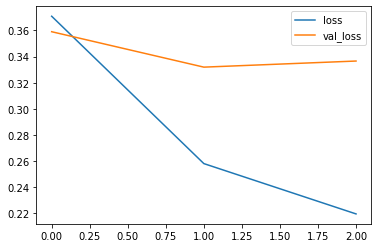

In [44]:
losses[['loss', 'val_loss']].plot()

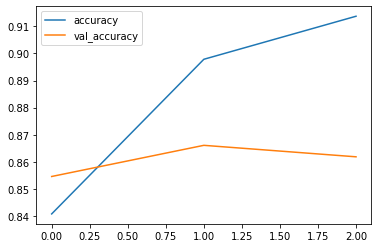

In [45]:
losses[['accuracy', 'val_accuracy']].plot()

In [46]:
model.metrics_names

['loss', 'accuracy']

In [62]:
score = model.evaluate(x_test, y_test)
print()
print('Accuracy:',score[1])
print('Loss:',score[0])

465/465 [==============================] - 8s 18ms/step - loss: 0.3366 - accuracy: 0.8618

Accuracy: 0.8618487119674683
Loss: 0.33656802773475647


In [63]:
y_pred = model.predict(x_test)

In [64]:
y_pred

array([[0.16855498],
       [0.9684355 ],
       [0.9818362 ],
       ...,
       [0.92503786],
       [0.46907118],
       [0.0118909 ]], dtype=float32)